In [3]:
import wandb
import numpy as np
import matplotlib.pyplot as plt

wandb.init(
    mode="offline",
    project="my-training",
    name="example-run"
)

for epoch in range(100):
    loss = np.exp(-epoch / 20) + np.random.rand() * 0.1
    acc = 1 - np.exp(-epoch / 10) + np.random.rand() * 0.05

    wandb.log({
        "epoch": epoch,
        "train/loss": loss,
        "train/accuracy": acc,
        "val/loss": loss * 0.8,
        "val/accuracy": min(acc * 1.05, 1.0)
    })

wandb.finish()

!wandb login

!wandb sync wandb/offline-run-*

api = wandb.Api()
run = api.run("s02200369-/my-training/runs/dcjmbfrz")
history = run.history()

epoch,▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇███
train/accuracy,▁▃▃▄▅▆▆▆▆▇▇▇▇███████████████████████████
train/loss,█▇▆▅▅▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▂▁▁▁▂▁▁▁▂▁▂
val/accuracy,▁▂▃▄▄▅▆▆▆▇██████████████████████████████
val/loss,█▇▇▆▆▅▄▃▄▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▂
epoch,99
train/accuracy,1.00455
train/loss,0.0944
val/accuracy,1
val/loss,0.07552


wandb: Currently logged in as: s02200369 (s02200369-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
Find logs at: /content/wandb/debug-cli.root.log
Syncing: https://wandb.ai/s02200369-/my-training/runs/bu3umaex ... done.
Syncing: https://wandb.ai/s02200369-/my-training/runs/h3v2vv6c ... done.
Syncing: https://wandb.ai/s02200369-/my-training/runs/22227ei1 ... done.


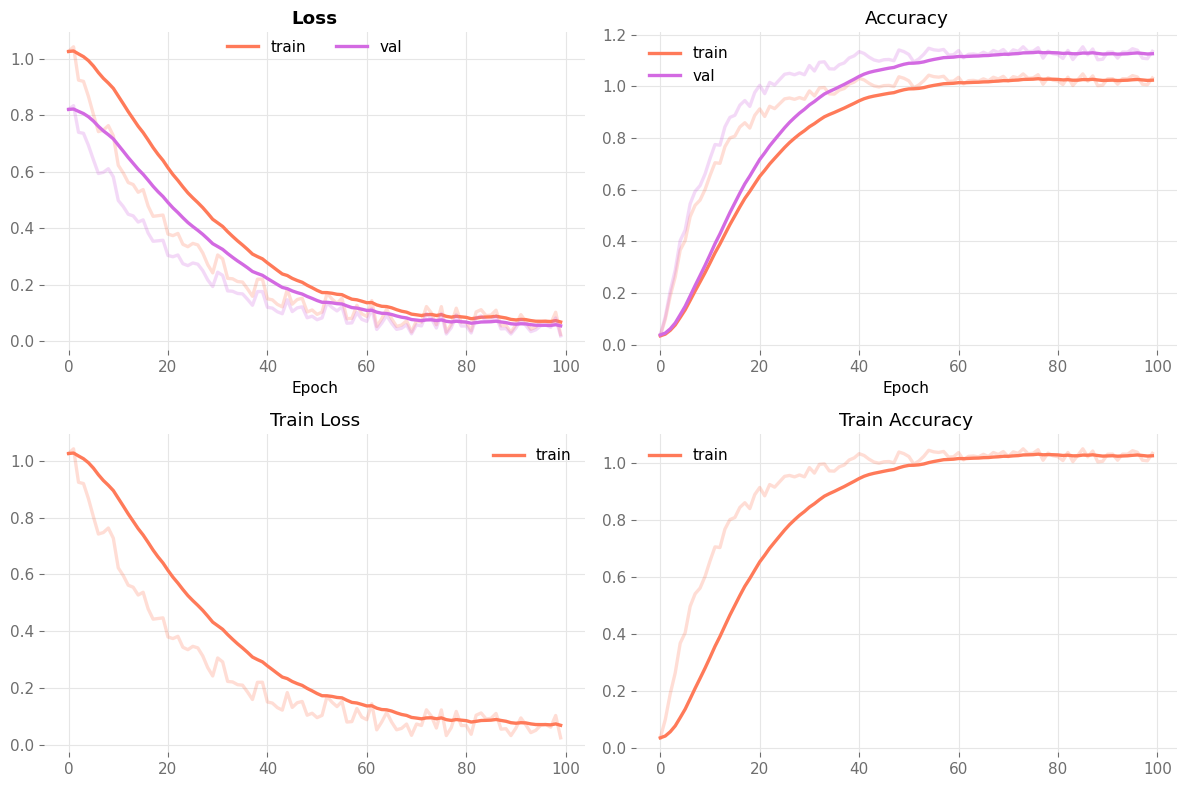

In [4]:
import matplotlib as mpl
mpl.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.grid": True,
    "grid.color": "#E6E6E6",
    "grid.linewidth": 0.8,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "xtick.color": "#6E6E6E",
    "ytick.color": "#6E6E6E",
    "font.size": 11,
    "lines.linewidth": 2.4,
})
WANDB_ORANGE = "#FF7A59"
WANDB_PINK   = "#D36AE2"
def ema(x, weight=0.9):
    smoothed = []
    last = x[0]
    for val in x:
        last = last * weight + (1 - weight) * val
        smoothed.append(last)
    return np.array(smoothed)
api = wandb.Api()

run = api.run("s02200369-/my-training/runs/dcjmbfrz")  # ← свой путь
history = run.history()
def wandb_style_plot(ax, x, y, color, label):
    ax.plot(x, y, color=color, alpha=0.25)
    ax.plot(x, ema(y), color=color, label=label)
    ax.legend(frameon=False)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

epochs = history["epoch"].values

wandb_style_plot(
    axes[0, 0],
    epochs,
    history["train_loss"].values,
    WANDB_ORANGE,
    "train"
)
wandb_style_plot(
    axes[0, 0],
    epochs,
    history["val_loss"].values,
    WANDB_PINK,
    "val"
)
axes[0, 0].set_title("Loss", fontweight="bold")
axes[0, 0].legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.02),
    ncol=2,
    frameon=False
)
axes[0, 0].set_xlabel("Epoch")

wandb_style_plot(
    axes[0, 1],
    epochs,
    history["train_accuracy"].values,
    WANDB_ORANGE,
    "train"
)
wandb_style_plot(
    axes[0, 1],
    epochs,
    history["val_accuracy"].values,
    WANDB_PINK,
    "val"
)
axes[0, 1].set_title("Accuracy")
axes[0, 1].set_xlabel("Epoch")

wandb_style_plot(
    axes[1, 0],
    epochs,
    history["train_loss"].values,
    WANDB_ORANGE,
    "train"
)
axes[1, 0].set_title("Train Loss")

wandb_style_plot(
    axes[1, 1],
    epochs,
    history["train_accuracy"].values,
    WANDB_ORANGE,
    "train"
)
axes[1, 1].set_title("Train Accuracy")

plt.tight_layout()
plt.show()
